Outliers based on Z-score:
            Order ID     Sales    z_score
27    US-2012-150630  3083.430   4.578800
165   CA-2011-139892  8159.952  12.724514
251   CA-2013-145625  3347.370   5.002314
262   US-2011-106992  3059.982   4.541176
263   US-2011-106992  2519.958   3.674661
...              ...       ...        ...
9741  CA-2012-117086  4404.900   6.699212
9774  CA-2011-169019  2177.584   3.125293
9857  CA-2012-164301  3393.680   5.076623
9929  CA-2013-129630  2799.960   4.123948
9948  CA-2014-121559  2405.200   3.490522

[127 rows x 3 columns]
Outliers based on IQR:
            Order ID      Sales
1     CA-2013-152156   731.9400
3     US-2012-108966   957.5775
7     CA-2011-115812   907.1520
10    CA-2011-115812  1706.1840
11    CA-2011-115812   911.4240
...              ...        ...
9931  CA-2012-104948   683.3320
9942  CA-2011-143371   998.8200
9947  CA-2014-121559  1925.8800
9948  CA-2014-121559  2405.2000
9968  CA-2014-153871   735.9800

[1167 rows x 2 columns]


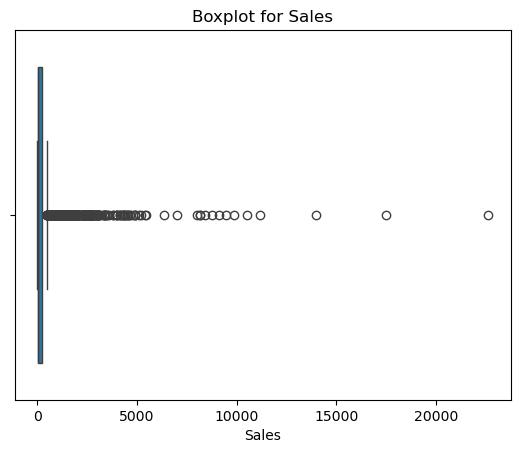

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("D:/Superstore.csv", encoding='windows-1252')
df['z_score'] =stats.zscore(df['Sales'])
outliers_zscore = df[df['z_score'].abs() > 3]
print("Outliers based on Z-score:")
print(outliers_zscore[['Order ID', 'Sales', 'z_score']])
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))
outliers_iqr = df[outlier_condition]
print("Outliers based on IQR:")
print(outliers_iqr[['Order ID', 'Sales']])
sns.boxplot(x=df['Sales'])
plt.title('Boxplot for Sales')
plt.show()
